## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 防止調用 GPU 報錯：Blas GEMM launch failed
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allocator_type = 'BFC' #A "Best-fit with coalescing" algorithm, simplified from a version of dlmalloc.
config.gpu_options.per_process_gpu_memory_fraction = 0.3
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """
    Build your model
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="tanh")(x)
    x = keras.layers.Dense(units=128, activation="sigmoid")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [5]:
"""
Compile your model
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
"""
Set epochs
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 85us/step - loss: 0.0076 - acc: 0.0179 - val_loss: 1.0000 - val_acc: 7.7019
Epoch 2/500
50000/50000 [==============================] - 3s 55us/step - loss: 3772115.8246 - acc: 629145.8147 - val_loss: 1.0000 - val_acc: 685.6149
Epoch 3/500
50000/50000 [==============================] - 3s 55us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 4/500
50000/50000 [==============================] - 3s 55us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 5/500
50000/50000 [==============================] - 3s 55us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 6/500
50000/50000 [==============================] - 3s 54us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 7/500
50000/50000 [==============================] - 3s 54us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 8/500
5000

50000/50000 [==============================] - 3s 59us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 64/500
50000/50000 [==============================] - 3s 64us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 65/500
50000/50000 [==============================] - 3s 53us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 66/500
50000/50000 [==============================] - 3s 60us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 67/500
50000/50000 [==============================] - 3s 54us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 68/500
50000/50000 [==============================] - 3s 53us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 69/500
50000/50000 [==============================] - 3s 54us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 70/500
50000/50000 [==============================] - 3s 58us/step - loss: nan - acc: nan - val_l

Epoch 126/500
50000/50000 [==============================] - 3s 51us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 127/500
50000/50000 [==============================] - 3s 51us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 128/500
50000/50000 [==============================] - 3s 54us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 129/500
50000/50000 [==============================] - 3s 53us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 130/500
50000/50000 [==============================] - 3s 51us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 131/500
50000/50000 [==============================] - 3s 54us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 132/500
50000/50000 [==============================] - 3s 58us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 133/500
50000/50000 [==============================] - 3s 58us/step - loss: n

50000/50000 [==============================] - 3s 63us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 189/500
50000/50000 [==============================] - 3s 64us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 190/500
50000/50000 [==============================] - 3s 54us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 191/500
50000/50000 [==============================] - 3s 59us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 192/500
50000/50000 [==============================] - 3s 56us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 193/500
50000/50000 [==============================] - 3s 51us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 194/500
50000/50000 [==============================] - 3s 53us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 195/500
50000/50000 [==============================] - 3s 52us/step - loss: nan - acc: nan 

50000/50000 [==============================] - 3s 56us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 251/500
50000/50000 [==============================] - 3s 57us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 252/500
50000/50000 [==============================] - 3s 56us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 253/500
50000/50000 [==============================] - 3s 57us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 254/500
50000/50000 [==============================] - 3s 56us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 255/500
50000/50000 [==============================] - 3s 55us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 256/500
50000/50000 [==============================] - 3s 55us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 257/500
50000/50000 [==============================] - 3s 56us/step - loss: nan - acc: nan 

50000/50000 [==============================] - 3s 54us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 313/500
50000/50000 [==============================] - 3s 54us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 314/500
50000/50000 [==============================] - 3s 54us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 315/500
50000/50000 [==============================] - 3s 54us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 316/500
50000/50000 [==============================] - 3s 54us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 317/500
50000/50000 [==============================] - 3s 55us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 318/500
50000/50000 [==============================] - 3s 54us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 319/500
50000/50000 [==============================] - 3s 54us/step - loss: nan - acc: nan 

Epoch 375/500
50000/50000 [==============================] - 3s 51us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 376/500
50000/50000 [==============================] - 3s 54us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 377/500
50000/50000 [==============================] - 3s 54us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 378/500
50000/50000 [==============================] - 3s 52us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 379/500
50000/50000 [==============================] - 3s 51us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 380/500
50000/50000 [==============================] - 3s 52us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 381/500
50000/50000 [==============================] - 3s 53us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 382/500
50000/50000 [==============================] - 3s 55us/step - loss: n

50000/50000 [==============================] - 3s 54us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 438/500
50000/50000 [==============================] - 3s 54us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 439/500
50000/50000 [==============================] - 3s 54us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 440/500
50000/50000 [==============================] - 3s 55us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 441/500
50000/50000 [==============================] - 3s 55us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 442/500
50000/50000 [==============================] - 3s 55us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 443/500
50000/50000 [==============================] - 3s 56us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 444/500
50000/50000 [==============================] - 3s 56us/step - loss: nan - acc: nan 

50000/50000 [==============================] - 3s 57us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan
Epoch 500/500
50000/50000 [==============================] - 3s 57us/step - loss: nan - acc: nan - val_loss: 1.0000 - val_acc: nan


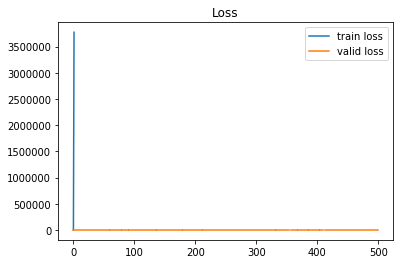

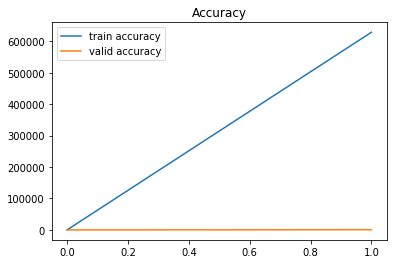

In [8]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()